In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp

Primero, agarro la inversa de distrib exponencial que tenía de la guía 2 y simulo las 50 mediciones

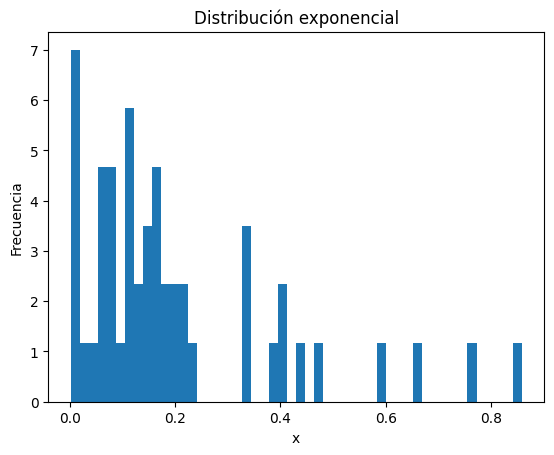

In [28]:
def pdf(x,l):
    pdf = np.exp(-x*l)*l
    return pdf

def cdf(x,l):
    cdf = 1-np.exp(-x*l)
    return cdf

def inv(y,l):
    inv = -np.log(1-y)/l
    return inv

y=np.random.rand(50)
x=inv(y,5)

plt.hist(x,bins=50,density=True)
plt.xlabel('x')
plt.ylabel('Frecuencia')
plt.title('Distribución exponencial')
plt.show()

$L =\prod_{i=1}^N \lambda e^{-\lambda x_i} $ 

$\log{L}=N\log{\lambda}-\lambda \sum_{i=1}^N x_i$

$\lambda=\frac{1}{\overline{x}}$

In [29]:
maxlikelihood = 1/np.mean(x)

print('El valor de máximo likelihood para estimar lambda es:',maxlikelihood)

El valor de máximo likelihood para estimar lambda es: 4.926479285075371


In [30]:
bordeinferr	= 3
bordesuperr	= 7

lambda_estimador = np.linspace(1, 10, 100)

def loglikelihood(x, l):
    L = np.sum(np.log(pdf(x, l)))
    return L

def priors(p):
	if bordeinferr <= p and p <= bordesuperr:
		return 0
	else:
		return -np.inf

def post(x, l):
    prior_prob = priors(l)
    return loglikelihood(x, l) + prior_prob

posterior	= np.zeros(len(lambda_estimador))
for i in range(len(lambda_estimador)):
				posterior[i] = post(x, lambda_estimador[i])

lambda_bayesiano =	lambda_estimador[np.argmax(posterior)]

print(posterior)
print('El valor de lambda que maximiza el posterior es:',lambda_bayesiano)


[       -inf        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf 24.48290699 25.05289735
 25.57961639 26.06550244 26.51279334 26.9235479  27.29966441 27.64289701
 27.95486984 28.23708962 28.49095669 28.7177748  28.91875979 29.09504732
 29.24769978 29.37771244 29.486019   29.57349657 29.64097013 29.68921662
 29.71896857 29.73091742 29.72571655 29.70398402 29.66630508 29.61323441
 29.54529828 29.46299639 29.36680369 29.25717193 29.1345312  28.99929124
 28.85184277 28.69255857 28.52179464 28.33989113 28.1471733  27.94395237
 27.73052632 27.50718062 27.27418892 27.03181372 26.78030694 26.51991047
 26.25085675        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf   

In [31]:
delta_frec = abs(5-maxlikelihood)
delta_bayes =	abs(5-lambda_bayesiano)

print(delta_bayes)
print(delta_frec)

porcen_frec	= (delta_frec/5)*100
porcen_bayes = (delta_bayes/5)*100

print('El error porcentual para el estimador frecuentista es:',porcen_frec)
print('El error porcentual para el estimador bayesiano es:',porcen_bayes)


0.09090909090909083
0.07352071492462908
El error porcentual para el estimador frecuentista es: 1.4704142984925817
El error porcentual para el estimador bayesiano es: 1.8181818181818168


Fluctua mucho, hagamos varias tiradas.

In [32]:
experimento = 10000

maxlikelihood_lista = np.zeros(experimento)
lambda_bayesiano_lista = np.zeros(experimento)

for j in range(experimento):

	y=np.random.rand(50)
	x=inv(y,5)

	maxlikelihood = 1/np.mean(x)
	maxlikelihood_lista[j] = maxlikelihood

	for i in range(len(lambda_estimador)):
					posterior[i] = post(x, lambda_estimador[i])

	lambda_bayesiano =	lambda_estimador[np.argmax(posterior)]
	lambda_bayesiano_lista[j] = lambda_bayesiano

frec_medio	= np.mean(maxlikelihood_lista)
bayes_medio	= np.mean(lambda_bayesiano_lista)

print('El valor medio del estimador frecuentista es:',frec_medio)
print('El valor medio del estimador bayesiano es:',bayes_medio)

delta_frec_lista	= abs(5-frec_medio)
delta_bayes_lista = abs(5-bayes_medio)
porcen_frec_lista	= (delta_frec_lista/5)*100
porcen_bayes_lista = (delta_bayes_lista/5)*100

print('Lambda frecuentista medio',frec_medio)
print('Lambda bayesiano medio',bayes_medio)
print('Error porcentual medio frecuentista',porcen_frec_lista)
print('Error porcentual medio bayesiano',porcen_bayes_lista)

El valor medio del estimador frecuentista es: 5.098541971553497
El valor medio del estimador bayesiano es: 5.093618181818182
Lambda frecuentista medio 5.098541971553497
Lambda bayesiano medio 5.093618181818182
Error porcentual medio frecuentista 1.970839431069944
Error porcentual medio bayesiano 1.8723636363636407
